<a href="https://colab.research.google.com/github/andrejadikic/IgraZivotaPython/blob/main/ParalelniAlgoritmi_Zad_1_1_i_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

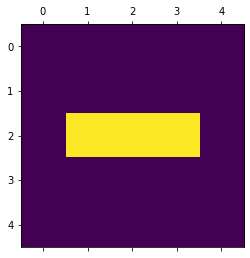

In [8]:
import threading
import random
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from IPython.display import HTML
import time

values = [0,1]
n = 5
#state je trenutno stanje matrice
#state = np.random.choice(values, n*n).reshape(n,n)
state = np.zeros((n, n)).astype(np.int8)
state[1][2]=1;
state[2][2]=1;
state[3][2]=1;
steps = [state]

#readcounters je brojac suseda koji su procitali trenutnu vrednost kad dodje do 8 onda se menja vrednost celije
readcounters = np.zeros((n, n)).astype(np.int8)

# matrica key za readcounter
read_key = np.array([threading.Lock() for i in range(n*n)]).reshape(n,n)

# iter_counter broji koliko celija je uslo u cekaonicu
start_counter = 0
# finish_counter koliko je izaslo iz 
finish_counter = n*n
#logicka promenljiva
cond = 1

start_key = threading.Lock()
finish_key = threading.Lock()
cond_key = threading.Lock()

def wakeUp(x,y):
    global n, readcounters 

    
    if( ((x==0 or x==n-1) and (y>0 and y<n-1)) or ((y==0 or y==n-1) and (x>0 and x<n-1)) ) and readcounters[x][y]==5:
       
      return 1
    elif (x==0 or x==n-1) and (y==0 or y==n-1) and readcounters[x][y]==3:
      
      return 1
    elif (x>0 and x<n-1) and (y<n-1 and y>0) and readcounters[x][y]==8:
      
      return 1
    else: 
      return 0

def getValue(x,y):
    global n
    global state
    global read_key
    global readcounters

    if (x>=0 and x<n and y>=0 and y<n):
      read_key[x][y].acquire
      readcounters[x][y] += 1
      read_key[x][y].release
      return state[x][y]
    return 0;

def count_alive_cells(curr_x, curr_y):
    alive_cells = 0
    cordinates = [(-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1)]

    for i,j in cordinates:
      alive_cells += getValue(curr_x+i,curr_y+j)

    return alive_cells

def isAlive(curr_val,alive_neigbors):
    if(alive_neigbors<2 or alive_neigbors>3):
      return 0
    elif((alive_neigbors==2 or alive_neigbors==3) and curr_val==1) or (curr_val==0 and alive_neigbors==3):
      return 1
    return curr_val

def copyState(s):
    states = []
    states = s.copy()
    return states

def playGame(x,y, iteration=10):
    global n
    global steps
    global state
    global read_key
    global readcounters
    global start_key
    global finish_key
    global cond_key
    global start_counter
    global finish_counter
    global cond

    for k in range(iteration):

      while(1):
        finish_key.acquire()
        if(finish_counter==n*n):
          finish_key.release()
          break;
        finish_key.release()
        time.sleep(0.01)

      start_key.acquire()
      if(start_counter==0):
        start_counter=1
        start_key.release()
        cond_key.acquire()
        cond=0
        cond_key.release()
      else:
        start_counter+=1
        start_key.release()


      neighbours = count_alive_cells(x,y)

      while(1):
        read_key[x][y].acquire()
        if(wakeUp(x,y) == 1):
          readcounters[x][y] = 0
          read_key[x][y].release()
          break
        read_key[x][y].release()
        time.sleep(0.01)
      
      

      start_key.acquire()
      if(start_counter==n*n):
        start_counter = 0
        start_key.release()
        steps.append(copyState(state))
        cond_key.acquire()
        cond=1
        cond_key.release()
        finish_key.acquire()
        finish_counter=0
        finish_key.release()
      else:
        start_key.release()

      
      while(1):
        cond_key.acquire()
        if(cond==1):
            state[x][y] = isAlive(state[x][y], neighbours)
            cond_key.release()
            finish_key.acquire()
            finish_counter+=1
            finish_key.release()
            break;
        cond_key.release()
        time.sleep(0.01)


      
      
def animate(steps):
  ''' Prima niz matrica (svaka matrica je stanje u jednom koraku simulacije) 
  prikazuje razvoj sistema'''
  
  def init():
    im.set_data(steps[0])
    return [im]
  
  
  def animate(i):
    im.set_data(steps[i])
    return [im]

  im = plt.matshow(steps[0], interpolation='None', animated=True);
  
  anim = FuncAnimation(im.get_figure(), animate, init_func=init,
                  frames=len(steps), interval=500, blit=True, repeat=False);
  return anim


threads=[]


for i in range(n):
  for j in range(n):
    t = threading.Thread(target=playGame, args=(i,j,))
    t.start()
    threads.append(t)



for t in threads:
  t.join()

anim = animate(steps)
HTML(anim.to_html5_video())

In [ ]:
import threading
import random
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from IPython.display import HTML
import time

values = [0,1]
n = 5
#state je trenutno stanje matrice
#state = np.random.choice(values, n*n).reshape(n,n)
state = np.zeros((n, n)).astype(np.int8)
state[1][2]=1;
state[2][2]=1;
state[3][2]=1;
steps = [state]


#readcounters je brojac suseda koji su procitali trenutnu vrednost kad dodje do 8 onda se menja vrednost celije
readcounters = np.zeros((n, n)).astype(np.int8)

# matrica key za readcounter
read_key = np.array([threading.Lock() for i in range(n*n)]).reshape(n,n)

# iter_counter broji koliko celija je uslo u cekaonicu
start_counter = 0
# finish_counter koliko je izaslo iz 
finish_counter = n*n
#logicka promenljiva
cond = 0

start_key = threading.Lock()
finish_key = threading.Lock()
cond_key = threading.Lock()

def wakeUp(x,y):
    global n
    global readcounters
    if( ((x==0 or x==n-1) and (y>0 and y<n-1)) or ((y==0 or y==n-1) and (x>0 and x<n-1)) ) and readcounters[x][y]==5:
      return 1
    elif (x==0 or x==n-1) and (y==0 or y==n-1) and readcounters[x][y]==3:
      return 1
    elif (x>0 and x<n-1) and (y<n-1 and y>0) and readcounters[x][y]==8:
      return 1
    return 0

def getValue(x,y):
    global n
    global state
    global read_key
    global readcounters

    if (x>=0 and x<n and y>=0 and y<n):
      read_key[x][y].acquire
      readcounters[x][y] += 1
      read_key[x][y].release
      return state[x][y]
    return 0;

def count_alive_cells(curr_x, curr_y):
    alive_cells = 0
    cordinates = [(-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1)]

    for i,j in cordinates:
      alive_cells += getValue(curr_x+i,curr_y+j)

    return alive_cells

def isAlive(curr_val,alive_neigbors):
    if(alive_neigbors<2 or alive_neigbors>3):
      return 0
    elif((alive_neigbors==2 or alive_neigbors==3) and curr_val==1) or (curr_val==0 and alive_neigbors==3):
      return 1
    return curr_val

def copyState(s):
    states = []
    states = s.copy()
    return states

def playGame(x,y, iteration=10):
    global n
    global steps
    global state
    global read_key
    global readcounters
    global start_key
    global finish_key
    global cond_key
    global start_counter
    global finish_counter
    global cond

    for k in range(10):

      #

      print(finish_counter)
      finish_key.acquire()

      if(finish_counter == n*n):
        finish_counter = 0
        finish_key.release()
        start_key.acquire()
        start_counter+=1
        start_key.release()

        cond_key.acquire()
        cond=0
        cond_key.release()

        while True:
            cond_key.acquire()
            if(cond==1):
                cond_key.release()
                break;
            cond_key.release()
            time.sleep(0.01)
      else:
        finish_key.release()

      
      start_key.acquire()
      if(start_counter>=1):
        start_counter+=1
        start_key.release()

        start_key.acquire()
        if(start_counter == n*n):
          start_counter=0
          start_key.release()

          cond_key.acquire()
          cond=1
          cond_key.release()
        else:
          start_key.release()


        while True:
            cond_key.acquire()
            if(cond==1):
                cond_key.release()
                break;
            cond_key.release()
            time.sleep(0.01)
      else:
        start_key.release()

      

      finish_key.acquire()
      if(finish_counter <= n*n):
        finish_counter+=1
        finish_key.release()
      else:
        finish_key.release()
      print("izlazim")

      # neighbours = count_alive_cells(x,y)
      
        
      # start_key.acquire()
      # finish_key.acquire()

      # if(finish_counter == n*n):

      #   finish_counter = 0
      #   start_counter=1

      #   start_key.release()
      #   finish_key.release()

      #   print(f'usao sam u finish')

      #   # im = plt.matshow(state, interpolation='None', animated=True);
      #   # steps.append(copyState(state))

      #   cond_key.acquire()
      #   cond=0
      #   cond_key.release()

      #   # start_key.acquire()
      #   # start_counter=1
      #   # start_key.release()
      #   time.sleep(1)
      # else:
      #   start_key.release()
      #   finish_key.release()
      

      # start_key.acquire()
      # if start_counter < n*n and start_counter > 1:
      #   start_counter+=1
      #   print("ulaze ostale niti")
      #   start_key.release()
      # else:
      #    start_key.release()


      # start_key.acquire()
      # if(start_counter == n*n):
      #   print("usla poslednja nit")

      #   start_counter = 0
      #   start_key.release()

      #   cond_key.acquire()
      #   cond=1
      #   cond_key.release()
      # else:
      #   start_key.release()

      # else:
      #   start_counter+=1
      #   start_key.release()

def animate(steps):
  ''' Prima niz matrica (svaka matrica je stanje u jednom koraku simulacije) 
  prikazuje razvoj sistema'''
  
  def init():
    im.set_data(steps[0])
    return [im]
  
  
  def animate(i):
    im.set_data(steps[i])
    return [im]

  im = plt.matshow(steps[0], interpolation='None', animated=True);
  
  anim = FuncAnimation(im.get_figure(), animate, init_func=init,
                  frames=len(steps), interval=500, blit=True, repeat=False);
  return anim


threads=[]


  
for i in range(n):
  for j in range(n):
    t = threading.Thread(target=playGame, args=(i,j,))
    threads.append(t)


for t in threads:
  t.start()

for t in threads:
  t.join()

# anim = animate(steps)
# HTML(anim.to_html5_video())

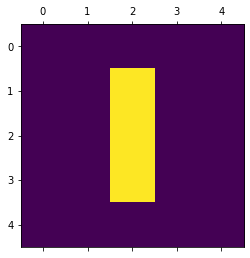

In [4]:
import threading
import random
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from IPython.display import HTML
import time

values = [0,1]
n = 5
#state je trenutno stanje matrice
#state = np.random.choice(values, n*n).reshape(n,n)
state = np.zeros((n, n)).astype(np.int8)
state[1][2]=1;
state[2][2]=1;
state[3][2]=1;
steps = [state]

#readcounters je brojac suseda koji su procitali trenutnu vrednost kad dodje do 8 onda se menja vrednost celije
readcounters = np.zeros((n, n)).astype(np.int8)
# matrica key za menjanje
read_key = np.array([threading.Lock() for i in range(n*n)]).reshape(n,n)

count = 0
condition = threading.Condition()
key = threading.Lock()

def wakeUp(x,y):
    global n
    global readcounters
    if( ((x==0 or x==n-1) and (y>0 and y<n-1)) or ((y==0 or y==n-1) and (x>0 and x<n-1)) ) and readcounters[x][y]==5:
      return 1
    elif (x==0 or x==n-1) and (y==0 or y==n-1) and readcounters[x][y]==3:
      return 1
    elif (x>0 and x<n-1) and (y<n-1 and y>0) and readcounters[x][y]==8:
      return 1
    return 0


def isAlive(curr_val,alive_neigbors):
    if(alive_neigbors<2 or alive_neigbors>3):
      return 0
    elif((alive_neigbors==2 or alive_neigbors==3) and curr_val==1) or (curr_val==0 and alive_neigbors==3):
      return 1
    return curr_val

def copyState(s):
  states = []
  states = s.copy()
  return states

def playGame(x,y, iteration=10):
    global n
    global steps
    global state
    global n
    global steps
    global count
    global condition
    global read_key
    global readcounters
    global key

    cordinates = [(-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1)]

    for k in range(iteration):
      neighbours = 0
      for i,j in cordinates:
        xx = x+i
        yy = y+j
        if(xx>=0 and xx<n and yy>=0 and yy<n):
          neighbours += state[xx][yy]
          read_key[xx][yy].acquire()
          readcounters[xx][yy]+=1
          read_key[xx][yy].release()

      while(1):
        read_key[x][y].acquire()
        if(wakeUp(x,y) == 1):
          readcounters[x][y] = 0
          read_key[x][y].release()
          break
        read_key[x][y].release()
        time.sleep(0.01)
        
      state[x][y] = isAlive(state[x][y], neighbours)
      
      condition.acquire() #conditionom zasticen i brojac celija
      count+=1

      if count == n ** 2:
        steps.append(copyState(state))
        count = 0;
        condition.notifyAll()
        condition.release()
      else:
        condition.wait()
        condition.release()
    



def animate(steps):
    ''' Prima niz matrica (svaka matrica je stanje u jednom koraku simulacije) 
    prikazuje razvoj sistema'''
    
    def init():
      im.set_data(steps[0])
      return [im]
    
    
    def animate(i):
      im.set_data(steps[i])
      return [im]

    im = plt.matshow(steps[0], interpolation='None', animated=True);
    
    anim = FuncAnimation(im.get_figure(), animate, init_func=init,
                    frames=len(steps), interval=500, blit=True, repeat=False);
    return anim


threads=[]
iteration = 5

for i in range(n):
  for j in range(n):
    t = threading.Thread(target=playGame, args=(i,j,))
    t.start()
    threads.append(t)

for t in threads:
  t.join()

anim = animate(steps)
HTML(anim.to_html5_video())